Automatically created module for IPython interactive environment


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Optimal number of features for SVM : 1
Optimal number of features for Logistic : 1


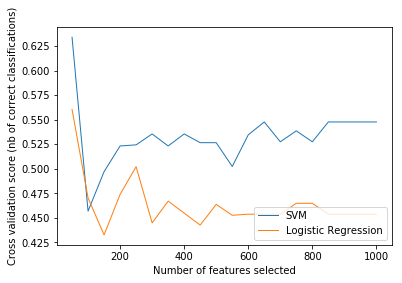

In [255]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#ffrom sklearn import linear_model, svm
from sklearn.datasets import make_classification
import os 
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import linear_model, svm

os.getcwd()
#os.chdir('/Users/yunwang/Documents/research/Jiook_AD/papers/idp_jiook_local/braindata')
dd =pd.read_csv("../braindata/data_1_mor.csv",header=0)
data=np.array(dd)
#print(data.shape)
idx_IN_columns = np.append(np.array([3,4]),np.array(range(11,data.shape[1])))
X=data[:,idx_IN_columns]

X = stats.zscore(X)
y=data[:,6]
#5: ad-smi / 6:mci-smi / 7:adonly-smi / 8:ad-mci / 9:adonly-mci / 10:adonly - adwithsmallvv

ind_num=np.isnan(y)


y_no_nan = y[~ind_num]

X_no_nan = X[~ind_num,:]

   # print(y.shape)

y=y_no_nan
X=X_no_nan
feature_num_all=[]
lr_all_feature=[]
svm_all_feature=[]
lr_fls_feature=[]
svm_fls_feature=[]

np.isnan(X).any()
X[np.isnan(X)] = np.median(X[~np.isnan(X)])

svc=SVC(kernel="linear",gamma=0.01)
SVMcv = RFECV(estimator=svc, step=50,cv=StratifiedKFold(10),
          scoring='accuracy')
SVMcv.fit(X, y)
logistic = linear_model.LogisticRegression(C=1e5)
LOGcv = RFECV(estimator=logistic, step=50,cv=StratifiedKFold(10),
          scoring='accuracy')
LOGcv.fit(X, y)

print("Optimal number of features for SVM : %d" % SVMcv.n_features_)
print("Optimal number of features for Logistic : %d" % LOGcv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot([x*50 for x in range(1, len(SVMcv.grid_scores_)+1)], SVMcv.grid_scores_,lw=1, label='SVM')
plt.plot([x*50 for x in range(1, len(LOGcv.grid_scores_)+1)], LOGcv.grid_scores_,lw=1, label='Logistic Regression')

plt.legend(loc="lower right")

plt.show()
plt.ylim([0, 100])
g_scores = SVMcv.grid_scores_
indices = np.argsort(g_scores)[::-1]
print('Printing SVMCV results:')
for f in range(1, len(SVMcv.grid_scores_)):
    print("%d. Number of features: %d;Grid_Score: %f" % (f , indices[f]*1000, g_scores[indices[f]]))

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot([x*2 or x in range(1, len(SVMcv.grid_scores_)+1)], SVMcv.grid_scores_,lw=1, label='SVM')
plt.plot([x*2 for x in range(1, len(LOGcv.grid_scores_)+1)], LOGcv.grid_scores_,lw=1, label='Logistic Regression')

plt.legend(loc="lower right")


plt.show()


In [251]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot([x*2 or x in range(1, len(SVMcv.grid_scores_)+1)], SVMcv.grid_scores_,lw=1, label='SVM')
plt.plot([x*2 for x in range(1, len(LOGcv.grid_scores_)+1)], LOGcv.grid_scores_,lw=1, label='Logistic Regression')

plt.legend(loc="lower right")


plt.show()

NameError: name 'x' is not defined

In [239]:
SVMcv.grid_scores_


array([ 0.73952381,  0.80142857,  0.84857143,  0.8347619 ,  0.8352381 ,
        0.82857143,  0.84190476,  0.8352381 ,  0.8352381 ,  0.82809524,
        0.84190476,  0.8352381 ,  0.84190476,  0.84190476,  0.8347619 ,
        0.84142857,  0.84142857,  0.84142857,  0.84142857,  0.8347619 ,
        0.8347619 ,  0.8347619 ,  0.8347619 ,  0.8347619 ,  0.8347619 ])

In [241]:
range(1, (len(LOGcv.grid_scores_)+1

SyntaxError: unexpected EOF while parsing (<ipython-input-241-3d58137b9183>, line 1)

In [181]:
X.shape

(93100, 1)

In [230]:
range(1, len(LOGcv.grid_scores_) + 1)

range(1, 26)